# 1. Datenaufbereitung. 
Da bei der ersten Bearbeitung des Datensatzes eine Fehlerhafte formatierung des Datumsformates durch die Teilfunktion 'parse_dates' entstanden ist, haben wir die Daten händisch in Excel bereinigt.  
(In den Monaten Juni und Juli war das Datumsformat spiegelverkehrt)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

Karte der Messstellen:
https://opendata.muenchen.de/dataset/raddauerzaehlstellen-muenchen/resource/211e882d-fadd-468a-bf8a-0014ae65a393?view_id=11a47d6c-0bc1-4bfa-93ea-126089b59c3d

In [3]:
bike = pd.read_csv('./bike_daily.csv', index_col='datum', parse_dates=['datum'])
bike.head()


uhrzeit_start uhrzeit_ende zaehlstelle  richtung_1  richtung_2  \
datum                                                                       
2017-01-01      00:00:00        23.59      Arnulf         121          14   
2017-01-02      00:00:00        23.59      Arnulf         362          38   
2017-01-03      00:00:00        23.59      Arnulf         232          30   
2017-01-04      00:00:00        23.59      Arnulf         182          25   
2017-01-05      00:00:00        23.59      Arnulf         193          31   

            gesamt  min-temp  max-temp  niederschlag  bewoelkung  \
datum                                                              
2017-01-01     135      -6.1       2.6           0.0          36   
2017-01-02     400      -5.4       0.8           3.2          69   
2017-01-03     262      -2.1       0.6           0.0          85   
2017-01-04     207      -0.9       1.3           2.2          94   
2017-01-05     224      -7.1      -0.2           0.0          88   

            sonnenstunden  
datum                      
2017-01-01            5.9  
2017-01-02            0.3  
2017-01-03            3.6  
2017-01-04            0.0  
2017-01-05            0.0

## 1.1 Messdaten auf Vollständigkeit gegenprüfen. 
Abgleich mit Tage-Rechner im Internet -> 2130 Tage

In [4]:
print('counts enthält %d Einträge.' % bike.index.shape)
print('Es gibt %d einzigartige Zeitstempel.' % bike.index.unique().shape)

counts enthält 12780 Einträge.
Es gibt 2130 einzigartige Zeitstempel.


## 1.2. Überprüfung auf fehlende Daten. 
Als nächstes überprüfen wir den Datensatz auf fehlerhafte Einträge (NaN)

In [5]:
bike.sort_index()
bike[bike.isna().any(axis=1)]

Empty DataFrame
Columns: [uhrzeit_start, uhrzeit_ende, zaehlstelle, richtung_1, richtung_2, gesamt, min-temp, max-temp, niederschlag, bewoelkung, sonnenstunden]
Index: []

Der Datensatz enthält keine fehlerhaften Einträge.

## 1.3. Entfernen der irrelevanten Features. (uhrzeit_start/-ende, und beider Richtungen)


In [6]:
bike_neu = bike.drop(['uhrzeit_start','uhrzeit_ende' , 'richtung_1', 'richtung_2'], axis=1)
bike_neu.head()

zaehlstelle  gesamt  min-temp  max-temp  niederschlag  bewoelkung  \
datum                                                                          
2017-01-01      Arnulf     135      -6.1       2.6           0.0          36   
2017-01-02      Arnulf     400      -5.4       0.8           3.2          69   
2017-01-03      Arnulf     262      -2.1       0.6           0.0          85   
2017-01-04      Arnulf     207      -0.9       1.3           2.2          94   
2017-01-05      Arnulf     224      -7.1      -0.2           0.0          88   

            sonnenstunden  
datum                      
2017-01-01            5.9  
2017-01-02            0.3  
2017-01-03            3.6  
2017-01-04            0.0  
2017-01-05            0.0

## 1.4. Aufteilen des Originalen Datensatz in ein Dictionary mit den einzelnen Zählstellen als Schlüssel.

In [7]:
zaehlstellen = ['Arnulf', 'Kreuther', 'Olympia', 'Hirsch', 'Margareten', 'Erhardt']
df_zaehlstellen = {}
for i in range(len(zaehlstellen)):
    df_zaehlstellen[zaehlstellen[i]] = bike_neu[bike_neu.zaehlstelle == zaehlstellen[i]]


In [8]:
print('counts enthält %d Einträge.' % df_zaehlstellen['Arnulf'].index.shape)
print('Es gibt %d einzigartige Zeitstempel.' % df_zaehlstellen['Arnulf'].index.unique().shape)

counts enthält 2130 Einträge.
Es gibt 2130 einzigartige Zeitstempel.


## 1.5. Gegenprüfung auf Vollständigkeit des Dictionaries mit allen Messstellendaten ggü. des originalen Datensatzes

In [9]:
length_all = 0
for i in range(len(zaehlstellen)):
    length_one = len(df_zaehlstellen[zaehlstellen[i]])
    length_all = length_one + length_all

print(f'Zeilenanzahl originaler Datensatz:  {len(bike_neu)}')
print(f'Zeilenanzahl der gesplitten Datensätze: {length_all}')

Zeilenanzahl originaler Datensatz:  12780
Zeilenanzahl der gesplitten Datensätze: 12780


Plotten der Gesamtanzahl der Fahrradfahrer*innen an einzelnen Messstellen.

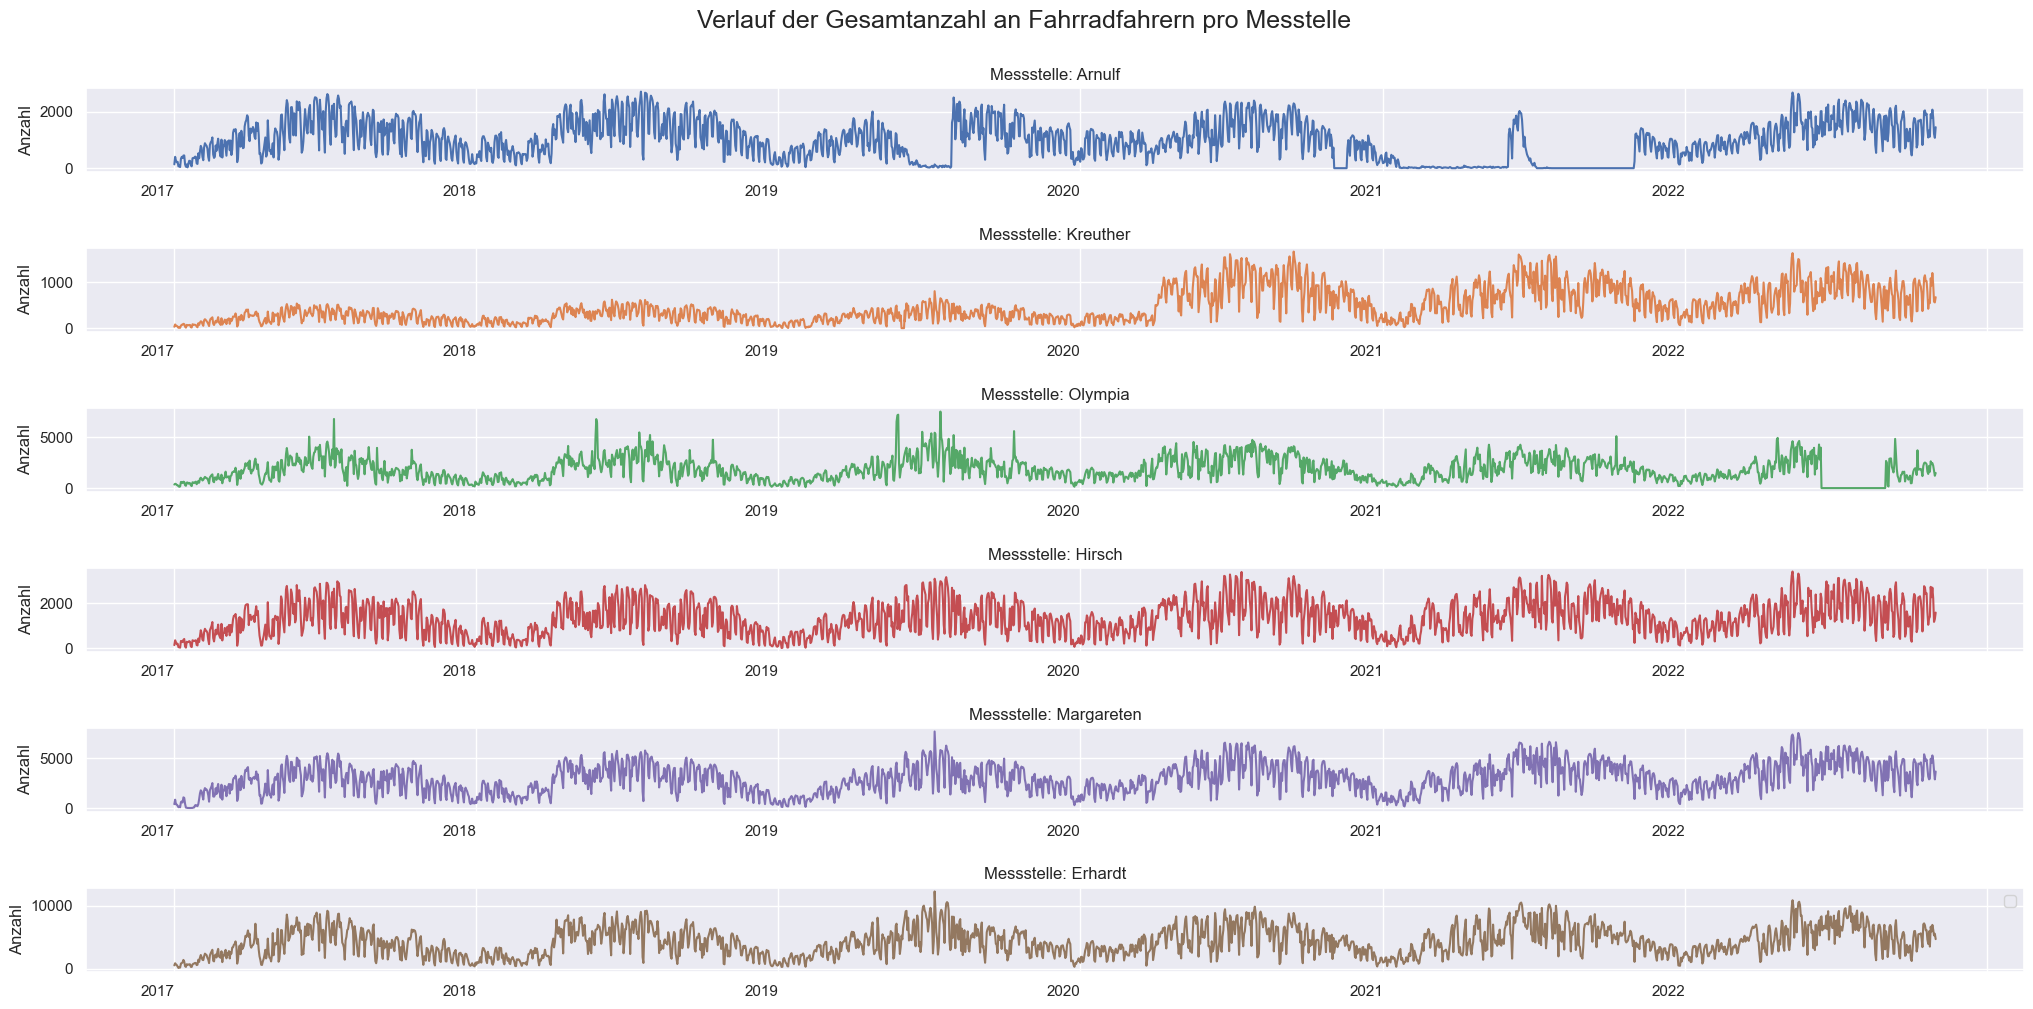

In [10]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(25, 13))
plt.subplots_adjust(hspace=0.9)
fig.suptitle('Verlauf der Gesamtanzahl an Fahrradfahrern pro Messtelle', fontsize=18, y=0.94)
stelle = 0

for zaehlstelle, ax in zip(zaehlstellen, axs.ravel()):
    for j in range(len(zaehlstellen)):
        try:
            df_zaehlstellen[zaehlstellen[j]].gesamt[df_zaehlstellen[zaehlstellen[j]]['zaehlstelle'] == zaehlstelle].plot(ax=ax)
        except ValueError:
            pass
    ax.set_title(f'Messstelle: {zaehlstellen[stelle]}')
    ax.autoscale(enable=True)
    ax.set_xticklabels(['', '2017', '2018', '2019', '2020', '2021', '2022'], rotation=0)
    stelle+=1
    ax.set_ylabel('Anzahl')
    ax.set_xlabel('')

plt.legend('')
plt.show()

Hier ist zusehen, dass die Baustelle an der Arnulfstraße die Messdaten erheblich beeinflusst hat. Somit werden ab diesem Punkt diese Messdaten vernachlässigt.  
Ebenso ist an Messstelle 'Olympia' ein Auffälligkeit ab Mitte 2022 zu erkennen. Hierzu wird der Datensatz auf Messlücken überprüft

In [11]:
del df_zaehlstellen['Arnulf']
del zaehlstellen[0]
messluecken = df_zaehlstellen['Olympia'][df_zaehlstellen['Olympia'].gesamt == 0]
messluecken

zaehlstelle  gesamt  min-temp  max-temp  niederschlag  bewoelkung  \
datum                                                                          
2022-06-15     Olympia       0      13.4      28.8           0.0          31   
2022-06-16     Olympia       0      17.2      28.7           0.1          44   
2022-06-17     Olympia       0      13.8      26.3           0.0          70   
2022-06-18     Olympia       0      14.5      31.9           0.0          21   
2022-06-19     Olympia       0      19.4      35.1           0.2          31   
...                ...     ...       ...       ...           ...         ...   
2022-08-27     Olympia       0      16.4      24.6          14.6          94   
2022-08-28     Olympia       0      15.2      20.8          10.7          78   
2022-08-29     Olympia       0      13.6      25.2           0.0          28   
2022-08-30     Olympia       0      13.5      26.9           0.0          39   
2022-08-31     Olympia       0      14.5      19.7           3.7          99   

            sonnenstunden  
datum                      
2022-06-15           14.3  
2022-06-16           11.8  
2022-06-17           14.9  
2022-06-18           14.5  
2022-06-19           14.8  
...                   ...  
2022-08-27            3.2  
2022-08-28            1.3  
2022-08-29           10.8  
2022-08-30           12.4  
2022-08-31            0.1  

[78 rows x 7 columns]

Hier ist zu erkennen, dass die Messdaten für Olympia ab dem 15.06.2022 Lücken aufweisen. Daher wird der Datensatz ab diesem Datum abgeschnitten.

In [12]:
df_zaehlstellen['Olympia'] = df_zaehlstellen['Olympia']['2017-01-01':'2022-06-14']
df_zaehlstellen['Olympia'].tail()



zaehlstelle  gesamt  min-temp  max-temp  niederschlag  bewoelkung  \
datum                                                                          
2022-06-10     Olympia    2758      11.2      21.4           0.0          54   
2022-06-11     Olympia    3064      11.2      25.0           0.0           6   
2022-06-12     Olympia    4277      14.8      28.5          10.1           3   
2022-06-13     Olympia    2795      13.4      22.9           0.0          73   
2022-06-14     Olympia    3978      11.0      23.9           0.0          31   

            sonnenstunden  
datum                      
2022-06-10           10.6  
2022-06-11           14.4  
2022-06-12           15.4  
2022-06-13            9.4  
2022-06-14           15.0

## 1.6. Hinzufügen der Wochentage

In [13]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(len(days)):
  for j in range(len(zaehlstellen)):
    df_zaehlstellen[zaehlstellen[j]].loc[:,days[i]] = (df_zaehlstellen[zaehlstellen[j]].index.dayofweek == i).astype(int)


## 1.7. Wetterdaten  
Hinzufügen der Features für Durchschnittstemperatur und 'Dry-Day'. Letzteres gilt der Abfrage, ob es an einem Tag geregnet hat oder nicht.

In [14]:
for j in range(len(zaehlstellen)):
    df_zaehlstellen[zaehlstellen[j]].insert(4, 'ø-temp', ((df_zaehlstellen[zaehlstellen[j]]['min-temp'] + df_zaehlstellen[zaehlstellen[j]]['max-temp'])/2), allow_duplicates=False)
    df_zaehlstellen[zaehlstellen[j]].insert(6, 'dry-day', (df_zaehlstellen[zaehlstellen[j]]['niederschlag'] == 0).astype(int))

In [15]:
df_zaehlstellen['Olympia']

zaehlstelle  gesamt  min-temp  max-temp  ø-temp  niederschlag  \
datum                                                                      
2017-01-01     Olympia     350      -6.1       2.6   -1.75           0.0   
2017-01-02     Olympia     422      -5.4       0.8   -2.30           3.2   
2017-01-03     Olympia     394      -2.1       0.6   -0.75           0.0   
2017-01-04     Olympia     297      -0.9       1.3    0.20           2.2   
2017-01-05     Olympia     288      -7.1      -0.2   -3.65           0.0   
...                ...     ...       ...       ...     ...           ...   
2022-06-10     Olympia    2758      11.2      21.4   16.30           0.0   
2022-06-11     Olympia    3064      11.2      25.0   18.10           0.0   
2022-06-12     Olympia    4277      14.8      28.5   21.65          10.1   
2022-06-13     Olympia    2795      13.4      22.9   18.15           0.0   
2022-06-14     Olympia    3978      11.0      23.9   17.45           0.0   

            dry-day  bewoelkung  sonnenstunden  Mon  Tue  Wed  Thu  Fri  Sat  \
datum                                                                          
2017-01-01        1          36            5.9    0    0    0    0    0    0   
2017-01-02        0          69            0.3    1    0    0    0    0    0   
2017-01-03        1          85            3.6    0    1    0    0    0    0   
2017-01-04        0          94            0.0    0    0    1    0    0    0   
2017-01-05        1          88            0.0    0    0    0    1    0    0   
...             ...         ...            ...  ...  ...  ...  ...  ...  ...   
2022-06-10        1          54           10.6    0    0    0    0    1    0   
2022-06-11        1           6           14.4    0    0    0    0    0    1   
2022-06-12        0           3           15.4    0    0    0    0    0    0   
2022-06-13        1          73            9.4    1    0    0    0    0    0   
2022-06-14        1          31           15.0    0    1    0    0    0    0   

            Sun  
datum            
2017-01-01    1  
2017-01-02    0  
2017-01-03    0  
2017-01-04    0  
2017-01-05    0  
...         ...  
2022-06-10    0  
2022-06-11    0  
2022-06-12    1  
2022-06-13    0  
2022-06-14    0  

[1991 rows x 16 columns]

## 1.8. Feiertage  
Kalenderdaten für Bayern ausgeben lassen  
Python-Script für Erzeugung deutscher Feiertage aus Github heruntergeladen  
Quelle: https://github.com/daviskirk/german-holidays


In [16]:
from german_holidays import get_german_holiday_calendar

cal_cls = get_german_holiday_calendar('BY')
cal = cal_cls()
holidays = cal.holidays()
holidays

DatetimeIndex(['1970-01-01', '1970-01-06', '1970-03-27', '1970-03-30',
               '1970-05-01', '1970-05-07', '1970-05-18', '1970-05-28',
               '1970-08-15', '1970-10-03',
               ...
               '2200-04-07', '2200-05-01', '2200-05-15', '2200-05-26',
               '2200-06-05', '2200-08-15', '2200-10-03', '2200-11-01',
               '2200-12-25', '2200-12-26'],
              dtype='datetime64[ns]', length=3004, freq=None)

Hinzufügen der Feiertage zu Datensatz

In [17]:
for j in range(len(zaehlstellen)):
    df_zaehlstellen[zaehlstellen[j]] = df_zaehlstellen[zaehlstellen[j]].join(pd.Series(1, index=holidays, name='holiday'))
    df_zaehlstellen[zaehlstellen[j]].fillna(0, inplace=True)
    df_zaehlstellen[zaehlstellen[j]].index.name = 'Datum'
    df_zaehlstellen[zaehlstellen[j]].holiday = df_zaehlstellen[zaehlstellen[j]].holiday.astype(int)

df_zaehlstellen['Kreuther']


zaehlstelle  gesamt  min-temp  max-temp  ø-temp  niederschlag  \
Datum                                                                      
2017-01-01    Kreuther      30      -6.1       2.6   -1.75           0.0   
2017-01-02    Kreuther      79      -5.4       0.8   -2.30           3.2   
2017-01-03    Kreuther      53      -2.1       0.6   -0.75           0.0   
2017-01-04    Kreuther      47      -0.9       1.3    0.20           2.2   
2017-01-05    Kreuther      34      -7.1      -0.2   -3.65           0.0   
...                ...     ...       ...       ...     ...           ...   
2022-10-27    Kreuther    1192       8.3      22.2   15.25           0.0   
2022-10-28    Kreuther     946       8.9      26.1   17.50           0.0   
2022-10-29    Kreuther     572      11.2      26.2   18.70           0.0   
2022-10-30    Kreuther     556       9.2      23.5   16.35           0.0   
2022-10-31    Kreuther     669       7.9      19.6   13.75           0.0   

            dry-day  bewoelkung  sonnenstunden  Mon  Tue  Wed  Thu  Fri  Sat  \
Datum                                                                          
2017-01-01        1          36            5.9    0    0    0    0    0    0   
2017-01-02        0          69            0.3    1    0    0    0    0    0   
2017-01-03        1          85            3.6    0    1    0    0    0    0   
2017-01-04        0          94            0.0    0    0    1    0    0    0   
2017-01-05        1          88            0.0    0    0    0    1    0    0   
...             ...         ...            ...  ...  ...  ...  ...  ...  ...   
2022-10-27        1          25            9.7    0    0    0    1    0    0   
2022-10-28        1          80            7.7    0    0    0    0    1    0   
2022-10-29        1          86            6.8    0    0    0    0    0    1   
2022-10-30        1          78            8.3    0    0    0    0    0    0   
2022-10-31        1          61            6.8    1    0    0    0    0    0   

            Sun  holiday  
Datum                     
2017-01-01    1        1  
2017-01-02    0        0  
2017-01-03    0        0  
2017-01-04    0        0  
2017-01-05    0        0  
...         ...      ...  
2022-10-27    0        0  
2022-10-28    0        0  
2022-10-29    0        0  
2022-10-30    1        0  
2022-10-31    0        0  

[2130 rows x 17 columns]

## 1.9. Oktoberfest
Zur Berücksichtigung wird ein Array mit den Daten der Oktoberfeste in den relevanten Jahren erzeugt

In [18]:
oktoberfest17 = pd.date_range(start='2017-09-16', end='2017-10-03')
oktoberfest18 = pd.date_range(start='2018-09-22', end='2018-10-07')
oktoberfest19 = pd.date_range(start='2019-09-21', end='2019-10-06')
oktoberfest22 = pd.date_range(start='2022-09-17', end='2022-10-03')

oktoberfest = oktoberfest17
oktoberfest = oktoberfest.append(oktoberfest18)
oktoberfest = oktoberfest.append(oktoberfest19)
oktoberfest = oktoberfest.append(oktoberfest22)

oktoberfest

DatetimeIndex(['2017-09-16', '2017-09-17', '2017-09-18', '2017-09-19',
               '2017-09-20', '2017-09-21', '2017-09-22', '2017-09-23',
               '2017-09-24', '2017-09-25', '2017-09-26', '2017-09-27',
               '2017-09-28', '2017-09-29', '2017-09-30', '2017-10-01',
               '2017-10-02', '2017-10-03', '2018-09-22', '2018-09-23',
               '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27',
               '2018-09-28', '2018-09-29', '2018-09-30', '2018-10-01',
               '2018-10-02', '2018-10-03', '2018-10-04', '2018-10-05',
               '2018-10-06', '2018-10-07', '2019-09-21', '2019-09-22',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-28', '2019-09-29', '2019-09-30',
               '2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06', '2022-09-17', '2022-09-18',
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
      

Erstellen des Features 'Oktoberfest' in den Dataframes und einfügen von True(1) und False(0) in entsprechender Spalte

In [19]:
for j in range(len(zaehlstellen)):
    df_zaehlstellen[zaehlstellen[j]] = df_zaehlstellen[zaehlstellen[j]].join(pd.Series(1, index=oktoberfest, name='oktoberfest'))
    df_zaehlstellen[zaehlstellen[j]].fillna(0, inplace=True)
    df_zaehlstellen[zaehlstellen[j]].oktoberfest = df_zaehlstellen[zaehlstellen[j]].oktoberfest.astype(int)
    df_zaehlstellen[zaehlstellen[j]].index.name = 'datum'

test = df_zaehlstellen['Kreuther'].loc[df_zaehlstellen['Kreuther']['oktoberfest'] == 1]
test

zaehlstelle  gesamt  min-temp  max-temp  ø-temp  niederschlag  \
datum                                                                      
2017-09-16    Kreuther      96       7.0      12.7    9.85           3.4   
2017-09-17    Kreuther     102       7.4      16.2   11.80           0.1   
2017-09-18    Kreuther     274       7.5      14.9   11.20           0.3   
2017-09-19    Kreuther     228       8.9      12.8   10.85           0.9   
2017-09-20    Kreuther     243       8.5      14.5   11.50           5.8   
...                ...     ...       ...       ...     ...           ...   
2022-09-29    Kreuther     654       7.0      10.3    8.65           3.8   
2022-09-30    Kreuther     722       6.9      13.3   10.10           0.0   
2022-10-01    Kreuther     280       8.0      12.7   10.35           8.6   
2022-10-02    Kreuther     144      10.6      18.9   14.75          29.6   
2022-10-03    Kreuther     351       5.2      15.6   10.40           0.0   

            dry-day  bewoelkung  sonnenstunden  Mon  Tue  Wed  Thu  Fri  Sat  \
datum                                                                          
2017-09-16        0          99            0.3    0    0    0    0    0    1   
2017-09-17        0          86            3.0    0    0    0    0    0    0   
2017-09-18        0          94            4.7    1    0    0    0    0    0   
2017-09-19        0         100            0.0    0    1    0    0    0    0   
2017-09-20        0          98            0.7    0    0    1    0    0    0   
...             ...         ...            ...  ...  ...  ...  ...  ...  ...   
2022-09-29        0          95            0.0    0    0    0    1    0    0   
2022-09-30        1          98            2.1    0    0    0    0    1    0   
2022-10-01        0          93            0.9    0    0    0    0    0    1   
2022-10-02        0          96            0.7    0    0    0    0    0    0   
2022-10-03        1          50            5.2    1    0    0    0    0    0   

            Sun  holiday  oktoberfest  
datum                                  
2017-09-16    0        0            1  
2017-09-17    1        0            1  
2017-09-18    0        0            1  
2017-09-19    0        0            1  
2017-09-20    0        0            1  
...         ...      ...          ...  
2022-09-29    0        0            1  
2022-09-30    0        0            1  
2022-10-01    0        0            1  
2022-10-02    1        0            1  
2022-10-03    0        1            1  

[67 rows x 18 columns]

## 1.10. Tageslichtstunden
Mittels der Funktion aus Praktikum 5

In [20]:
from datetime import datetime

def hours_of_daylight(date, axis=11.57, latitude=48.14):
    '''Compute the hours of daylight for the given date'''
    days = (date - datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

In [21]:
for j in range(len(zaehlstellen)):
    df_zaehlstellen[zaehlstellen[j]]['daylight_hrs'] = list(map(hours_of_daylight, df_zaehlstellen[zaehlstellen[j]].index))


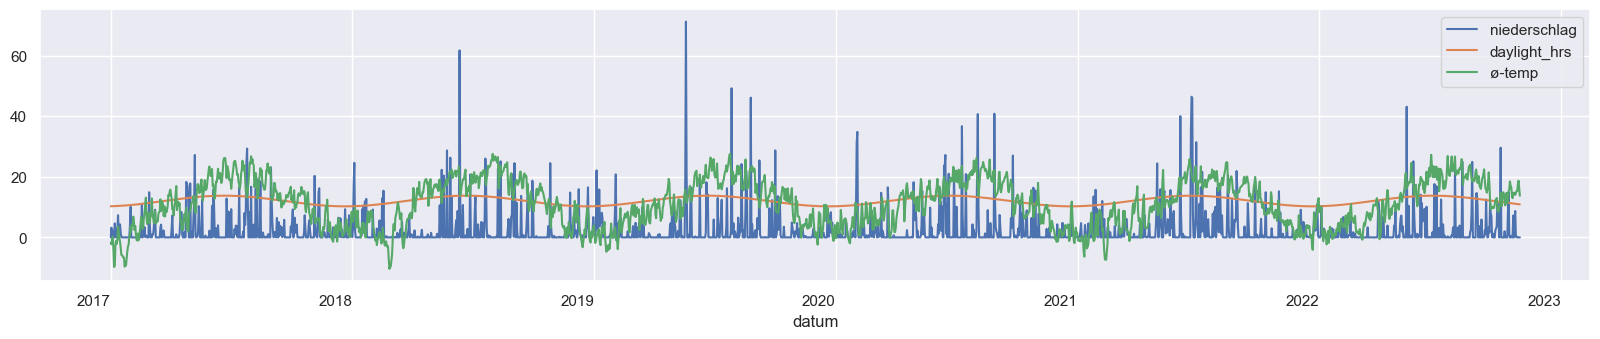

In [22]:
df_zaehlstellen['Kreuther']['niederschlag'].plot()
df_zaehlstellen['Kreuther']['daylight_hrs'].plot()
df_zaehlstellen['Kreuther']['ø-temp'].plot(figsize=(20, 4), rot = 0)
plt.legend()

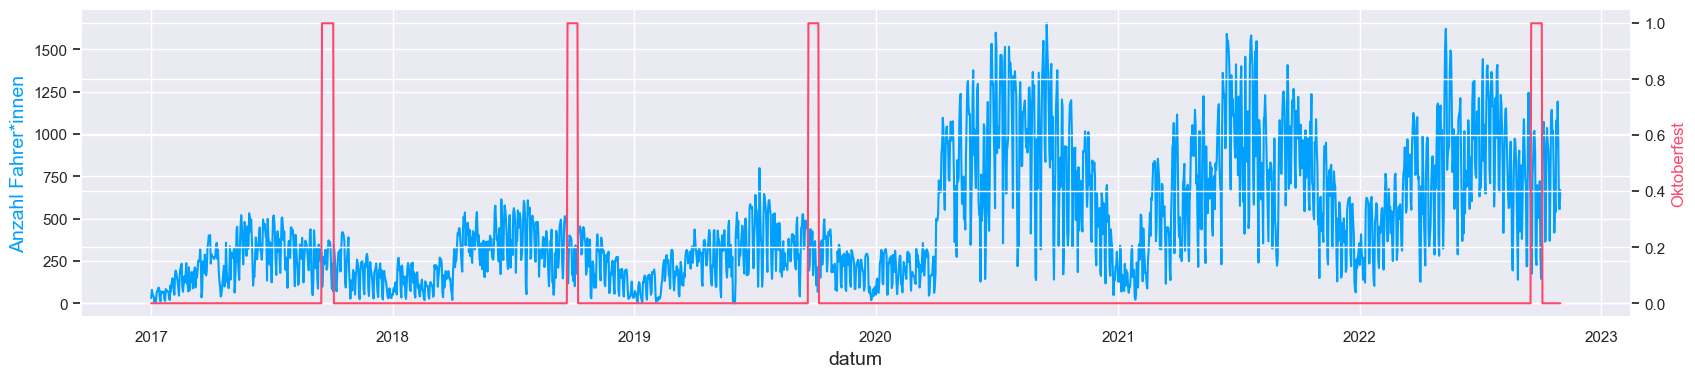

In [23]:
kreuther = df_zaehlstellen['Kreuther']
fig, ax = plt.subplots( figsize=(20,4))
ax.plot(kreuther.index, kreuther.gesamt, color='#00a0FF')
ax.set_xlabel('datum', fontsize=14)
ax.set_ylabel('Anzahl Fahrer*innen', color='#00a0FF', fontsize=14)
ax2 = ax.twinx()
ax2.plot(kreuther.index, kreuther.oktoberfest, color='#fe476d')
ax2.set_ylabel('Oktoberfest', color='#Fe476d')


plt.show()

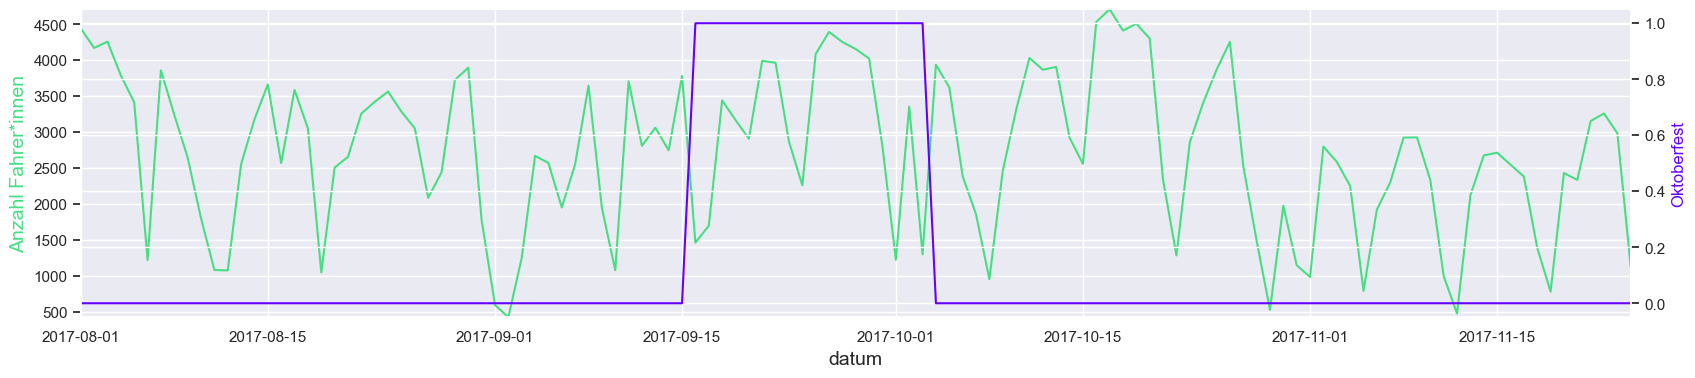

In [24]:
margareten = df_zaehlstellen['Margareten']['2017-08-01':'2017-11-25']
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(margareten.index, margareten.gesamt, color='#47de83')
ax.set_xlabel('datum', fontsize=14)
ax.set_ylabel('Anzahl Fahrer*innen', color='#47de83', fontsize=14)
ax2 = ax.twinx()
ax2.plot(margareten.index, margareten.oktoberfest, color='#6600ff')
ax2.set_ylabel('Oktoberfest', color='#6600ff')
ax.autoscale(enable=None, axis='x', tight=True)

plt.show()

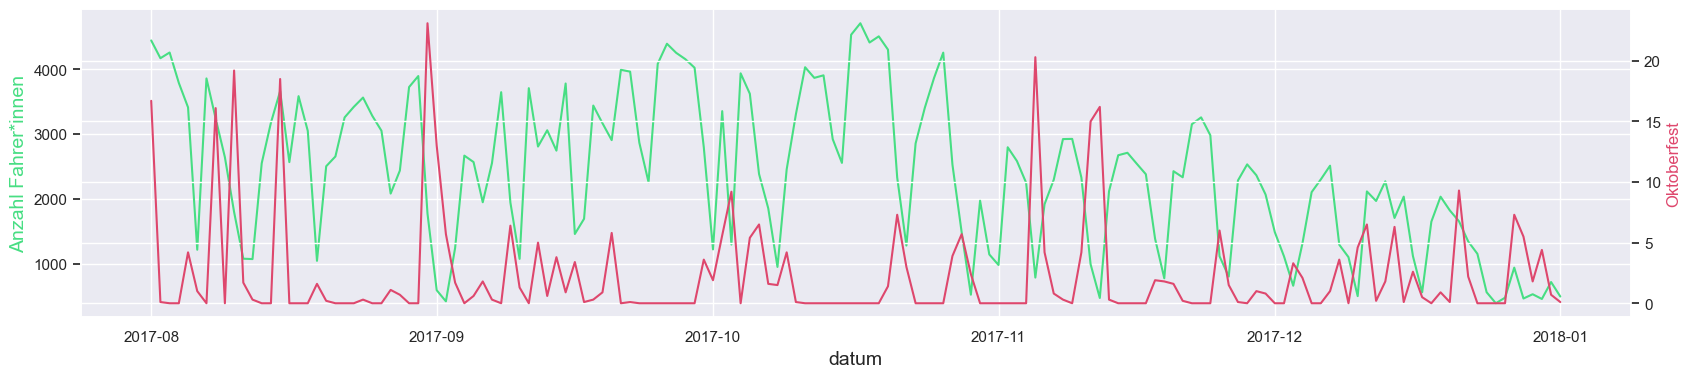

In [25]:
margareten = df_zaehlstellen['Margareten']['2017-08-01':'2018-01-01']
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(margareten.index, margareten.gesamt, color='#47de83')
ax.set_xlabel('datum', fontsize=14)
ax.set_ylabel('Anzahl Fahrer*innen', color='#47de83', fontsize=14)
ax2 = ax.twinx()
ax2.plot(margareten.index, margareten.niederschlag, color='#de476d')
ax2.set_ylabel('Oktoberfest', color='#de476d')

plt.show()

### zum Vergleich: https://dateandtime.info/de/citysunrisesunset.php?id=2867714&month=1&year=2023

## 1.11. Trend von Jahr zu Jahr

In [26]:
for j in range(len(zaehlstellen)):
    df_zaehlstellen[zaehlstellen[j]]['annual'] = (df_zaehlstellen[zaehlstellen[j]].index - df_zaehlstellen[zaehlstellen[j]].index[0]).days / 365

In [27]:
test = df_zaehlstellen['Kreuther'][df_zaehlstellen['Kreuther']['annual'].between(0.99, 1.01)]
test

zaehlstelle  gesamt  min-temp  max-temp  ø-temp  niederschlag  \
datum                                                                      
2017-12-29    Kreuther      37      -2.0       2.2    0.10           1.8   
2017-12-30    Kreuther      31       2.0      10.5    6.25           4.4   
2017-12-31    Kreuther      55       3.5      13.5    8.50           0.7   
2018-01-01    Kreuther      50       3.5       8.4    5.95           0.1   
2018-01-02    Kreuther      85       3.0       7.2    5.10           3.2   
2018-01-03    Kreuther      94       2.9      14.5    8.70          16.9   
2018-01-04    Kreuther      70       4.1      11.8    7.95          24.6   

            dry-day  bewoelkung  sonnenstunden  Mon  Tue  Wed  Thu  Fri  Sat  \
datum                                                                          
2017-12-29        0          73            6.5    0    0    0    0    1    0   
2017-12-30        0          98            0.0    0    0    0    0    0    1   
2017-12-31        0          73            6.6    0    0    0    0    0    0   
2018-01-01        0          75            2.1    1    0    0    0    0    0   
2018-01-02        0          93            0.5    0    1    0    0    0    0   
2018-01-03        0          95            0.2    0    0    1    0    0    0   
2018-01-04        0          96            0.0    0    0    0    1    0    0   

            Sun  holiday  oktoberfest  daylight_hrs    annual  
datum                                                          
2017-12-29    0        0            0     10.255247  0.991781  
2017-12-30    0        0            0     10.259724  0.994521  
2017-12-31    1        0            0     10.264738  0.997260  
2018-01-01    0        1            0     10.270286  1.000000  
2018-01-02    0        0            0     10.276366  1.002740  
2018-01-03    0        0            0     10.282977  1.005479  
2018-01-04    0        0            0     10.290114  1.008219

## 1.12. Pandemie

In [28]:
for j in range(len(zaehlstellen)):
    df_zaehlstellen[zaehlstellen[j]]['Pandemie'] = ((df_zaehlstellen[zaehlstellen[j]].index > '2020-03-01') & (df_zaehlstellen[zaehlstellen[j]].index < '2022-03-01'))
    df_zaehlstellen[zaehlstellen[j]].Pandemie = df_zaehlstellen[zaehlstellen[j]].Pandemie.astype(int)

    
test2 = df_zaehlstellen['Kreuther'].loc[df_zaehlstellen['Kreuther']['Pandemie'] == 1]
test2


zaehlstelle  gesamt  min-temp  max-temp  ø-temp  niederschlag  \
datum                                                                      
2020-03-02    Kreuther     322       2.8       9.4    6.10           2.1   
2020-03-03    Kreuther     213       1.7       6.0    3.85           1.3   
2020-03-04    Kreuther     287       0.6       7.0    3.80           0.0   
2020-03-05    Kreuther     252       0.6       9.4    5.00           5.5   
2020-03-06    Kreuther     237       3.5       8.2    5.85           0.2   
...                ...     ...       ...       ...     ...           ...   
2022-02-24    Kreuther     766      -0.1      14.3    7.10           1.2   
2022-02-25    Kreuther     565       0.9       5.5    3.20           0.2   
2022-02-26    Kreuther     256      -1.1       4.4    1.65           0.0   
2022-02-27    Kreuther     310      -2.1       6.1    2.00           0.0   
2022-02-28    Kreuther     537      -3.3       6.3    1.50           0.0   

            dry-day  bewoelkung  sonnenstunden  Mon  ...  Wed  Thu  Fri  Sat  \
datum                                                ...                       
2020-03-02        0          78            5.0    1  ...    0    0    0    0   
2020-03-03        0          94            0.1    0  ...    0    0    0    0   
2020-03-04        1          75            2.3    0  ...    1    0    0    0   
2020-03-05        0          84            0.2    0  ...    0    1    0    0   
2020-03-06        0          99            2.7    0  ...    0    0    1    0   
...             ...         ...            ...  ...  ...  ...  ...  ...  ...   
2022-02-24        0          85            8.1    0  ...    0    1    0    0   
2022-02-25        0          75            4.1    0  ...    0    0    1    0   
2022-02-26        1          80            4.2    0  ...    0    0    0    1   
2022-02-27        1          14            9.5    0  ...    0    0    0    0   
2022-02-28        1           0           10.6    1  ...    0    0    0    0   

            Sun  holiday  oktoberfest  daylight_hrs    annual  Pandemie  
datum                                                                    
2020-03-02    0        0            0     11.416034  3.167123         1  
2020-03-03    0        0            0     11.444194  3.169863         1  
2020-03-04    0        0            0     11.472499  3.172603         1  
2020-03-05    0        0            0     11.500942  3.175342         1  
2020-03-06    0        0            0     11.529515  3.178082         1  
...         ...      ...          ...           ...       ...       ...  
2022-02-24    0        0            0     11.237075  5.150685         1  
2022-02-25    0        0            0     11.264102  5.153425         1  
2022-02-26    0        0            0     11.291323  5.156164         1  
2022-02-27    1        0            0     11.318733  5.158904         1  
2022-02-28    0        0            0     11.346322  5.161644         1  

[729 rows x 21 columns]

### https://engineeringfordatascience.com/posts/matplotlib_subplots/

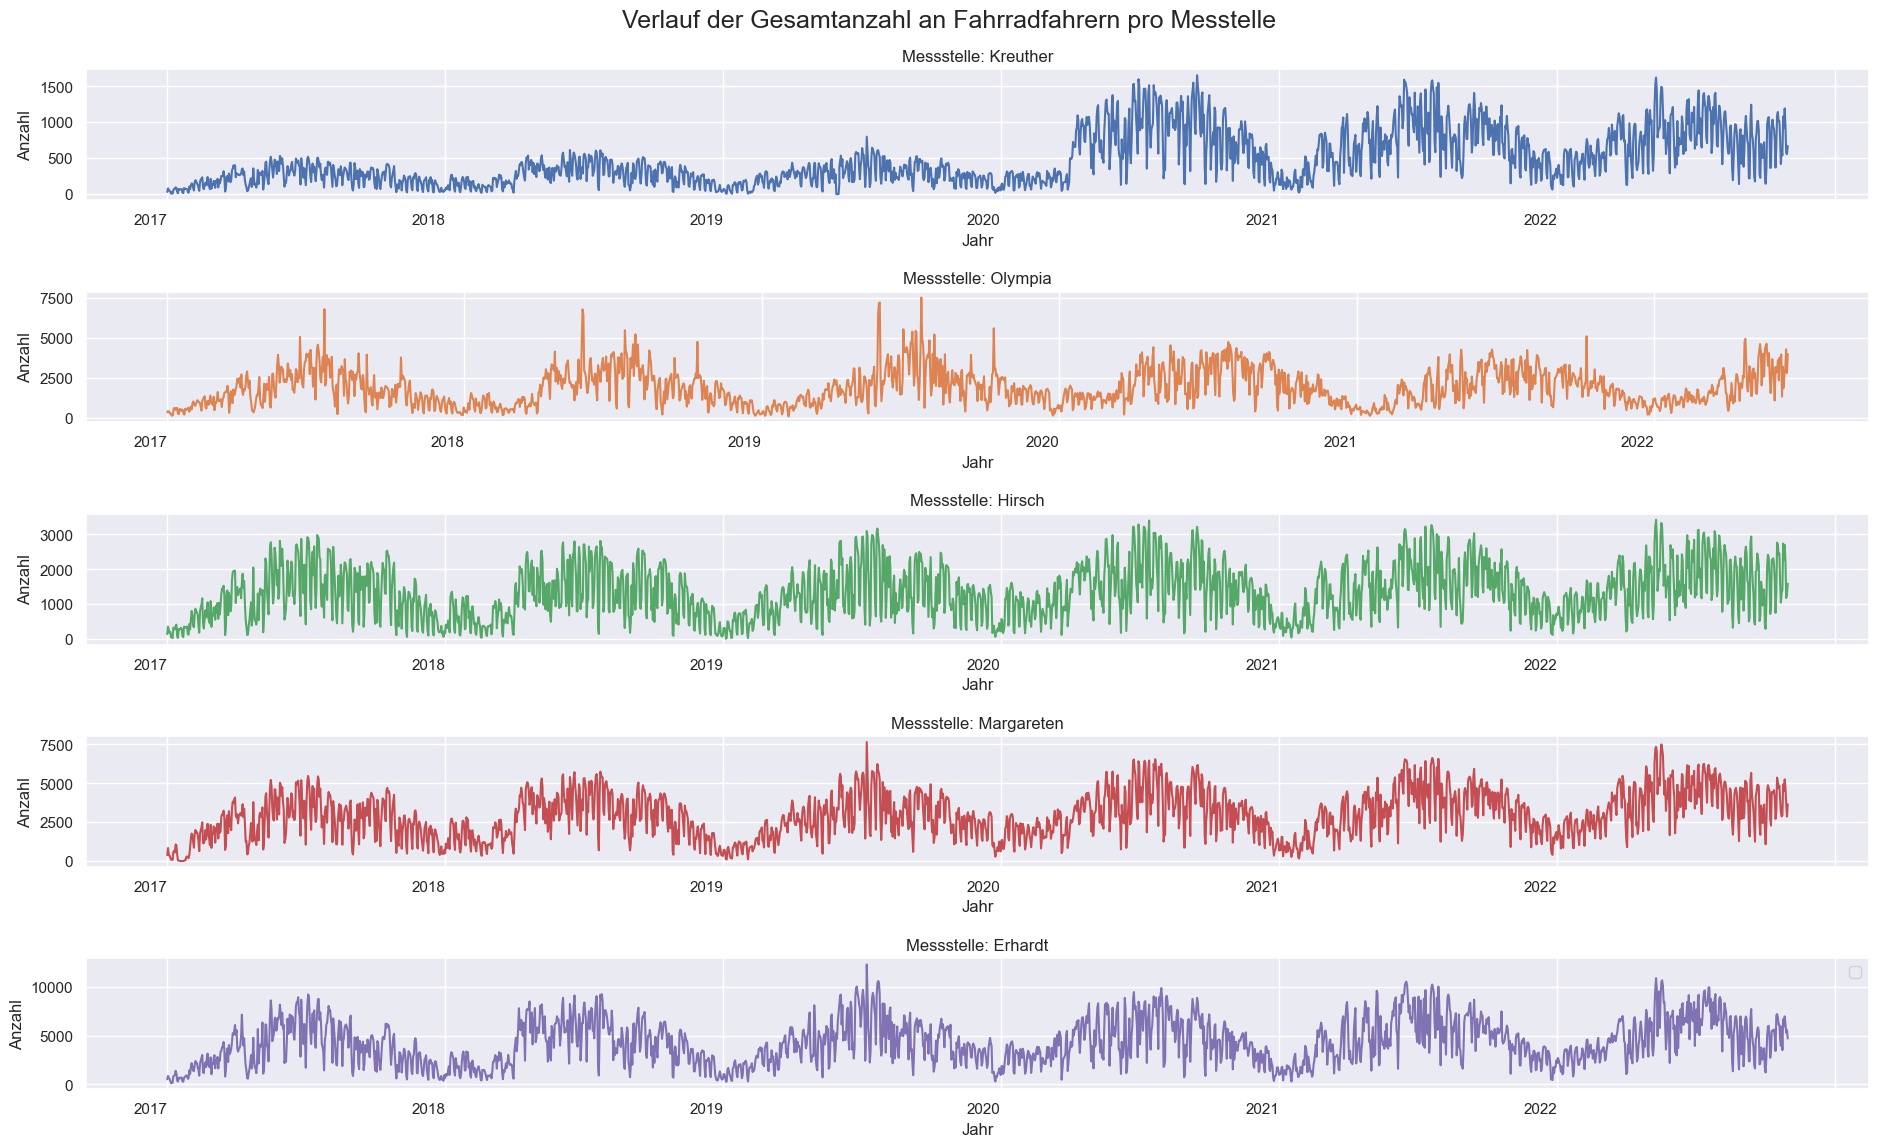

In [29]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(23, 15))
plt.subplots_adjust(hspace=0.7)
fig.suptitle('Verlauf der Gesamtanzahl an Fahrradfahrern pro Messtelle', fontsize=18, y=0.92)
stelle = 0

for zaehlstelle, ax in zip(zaehlstellen, axs.ravel()):
    for j in range(len(zaehlstellen)):
        try:
            df_zaehlstellen[zaehlstellen[j]].gesamt[df_zaehlstellen[zaehlstellen[j]]['zaehlstelle'] == zaehlstelle].plot(ax=ax)
        except ValueError:
            pass
    ax.set_title(f'Messstelle: {zaehlstellen[stelle]}')
    ax.set_xlabel('Jahr')
    ax.autoscale(enable=True)
    ax.set_xticklabels(['', '2017', '2018', '2019', '2020', '2021', '2022'], rotation=0)
    ax.set_ylabel('Anzahl')
    stelle += 1

plt.legend('')
plt.show()

In [30]:
for j in range(len(zaehlstellen)):
    check_isna = df_zaehlstellen[zaehlstellen[j]].isna().sum()
    
check_isna

zaehlstelle      0
gesamt           0
min-temp         0
max-temp         0
ø-temp           0
niederschlag     0
dry-day          0
bewoelkung       0
sonnenstunden    0
Mon              0
Tue              0
Wed              0
Thu              0
Fri              0
Sat              0
Sun              0
holiday          0
oktoberfest      0
daylight_hrs     0
annual           0
Pandemie         0
dtype: int64

# 2. Modell

<AxesSubplot: xlabel='datum'>

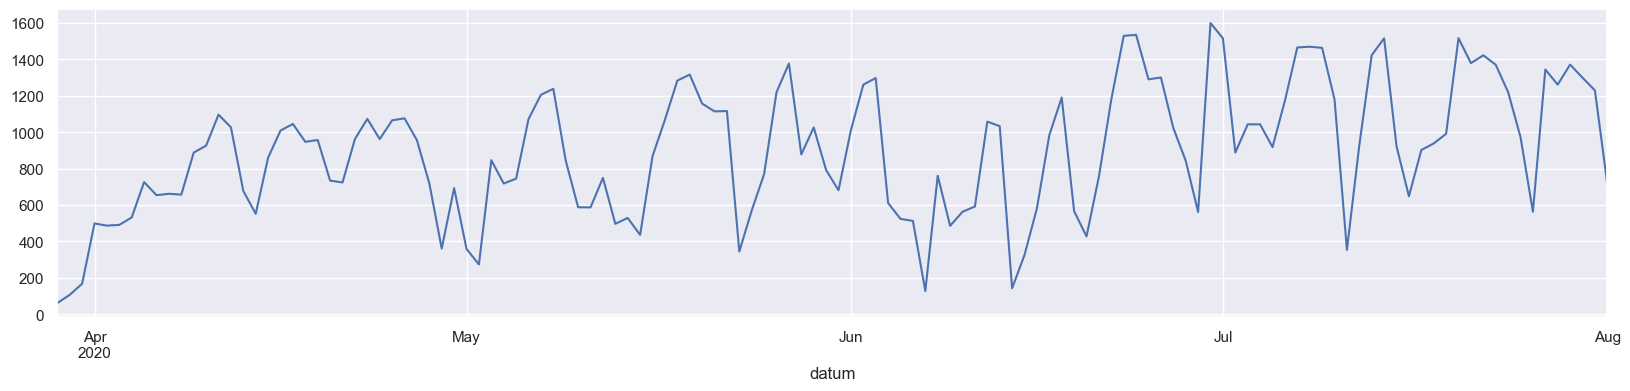

In [31]:
df_zaehlstellen['Kreuther']['gesamt'].loc['2020-03-29':'2020-08-01'].plot(figsize=(20,4))

In [32]:
kreuther1 = df_zaehlstellen['Kreuther'].loc['2017-01-01':'2020-03-28']
kreuther2 = df_zaehlstellen['Kreuther'].loc['2020-03-29':'2022-10-31']


In [33]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',	'ø-temp', 'dry-day', 'bewoelkung', 'sonnenstunden', 'oktoberfest', 'daylight_hrs', 'annual', 'Pandemie']
X = {}
y = {}
for i in range(len(zaehlstellen)):
    #if i == 0:
    #    X[zaehlstellen[i]] = kreuther2[column_names]
    #    y[zaehlstellen[i]] = kreuther2['gesamt']
    #else:
    X[zaehlstellen[i]] = df_zaehlstellen[zaehlstellen[i]][column_names]
    y[zaehlstellen[i]] = df_zaehlstellen[zaehlstellen[i]]['gesamt']


In [34]:
#bike_neu[bike_neu.zaehlstelle == zaehlstellen[i]]
X['Kreuther']

Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  ø-temp  dry-day  \
datum                                                                     
2017-01-01    0    0    0    0    0    0    1        1   -1.75        1   
2017-01-02    1    0    0    0    0    0    0        0   -2.30        0   
2017-01-03    0    1    0    0    0    0    0        0   -0.75        1   
2017-01-04    0    0    1    0    0    0    0        0    0.20        0   
2017-01-05    0    0    0    1    0    0    0        0   -3.65        1   
...         ...  ...  ...  ...  ...  ...  ...      ...     ...      ...   
2022-10-27    0    0    0    1    0    0    0        0   15.25        1   
2022-10-28    0    0    0    0    1    0    0        0   17.50        1   
2022-10-29    0    0    0    0    0    1    0        0   18.70        1   
2022-10-30    0    0    0    0    0    0    1        0   16.35        1   
2022-10-31    1    0    0    0    0    0    0        0   13.75        1   

            bewoelkung  sonnenstunden  oktoberfest  daylight_hrs    annual  \
datum                                                                        
2017-01-01          36            5.9            0     10.271756  0.000000   
2017-01-02          69            0.3            0     10.277969  0.002740   
2017-01-03          85            3.6            0     10.284712  0.005479   
2017-01-04          94            0.0            0     10.291980  0.008219   
2017-01-05          88            0.0            0     10.299772  0.010959   
...                ...            ...          ...           ...       ...   
2022-10-27          25            9.7            0     10.997718  5.821918   
2022-10-28          80            7.7            0     10.973139  5.824658   
2022-10-29          86            6.8            0     10.948841  5.827397   
2022-10-30          78            8.3            0     10.924832  5.830137   
2022-10-31          61            6.8            0     10.901120  5.832877   

            Pandemie  
datum                 
2017-01-01         0  
2017-01-02         0  
2017-01-03         0  
2017-01-04         0  
2017-01-05         0  
...              ...  
2022-10-27         0  
2022-10-28         0  
2022-10-29         0  
2022-10-30         0  
2022-10-31         0  

[2130 rows x 16 columns]

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False, positive=True)

for i in range(len(zaehlstellen)):
    #if i == 0:
    #    model.fit(X[zaehlstellen[i]], y[zaehlstellen[i]])
    #    df_zaehlstellen[zaehlstellen[i]]['pred_lin'] = model.predict(X[zaehlstellen[i]])
    #else:
    model.fit(X[zaehlstellen[i]], y[zaehlstellen[i]])
    df_zaehlstellen[zaehlstellen[i]]['pred_lin'] = model.predict(X[zaehlstellen[i]])

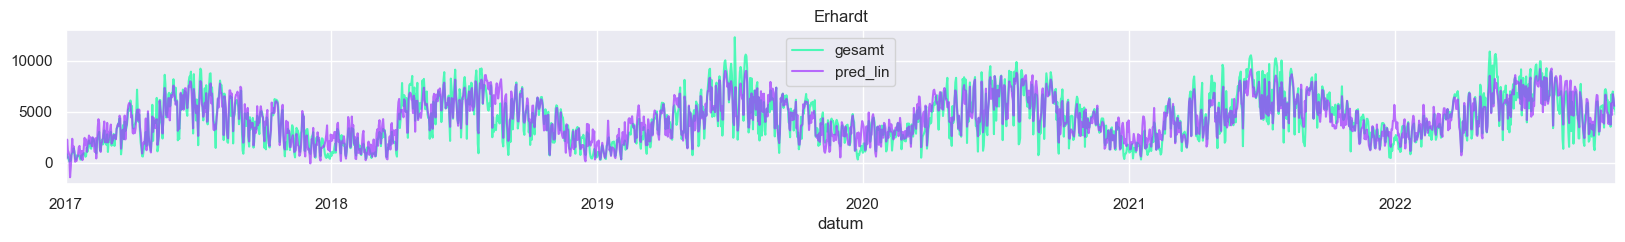

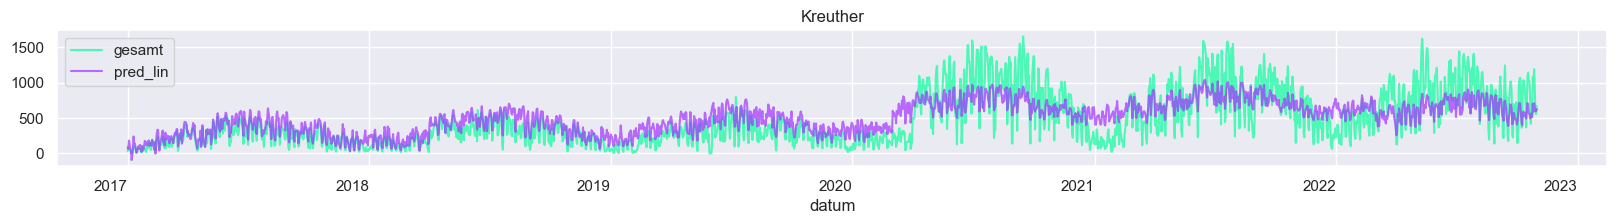

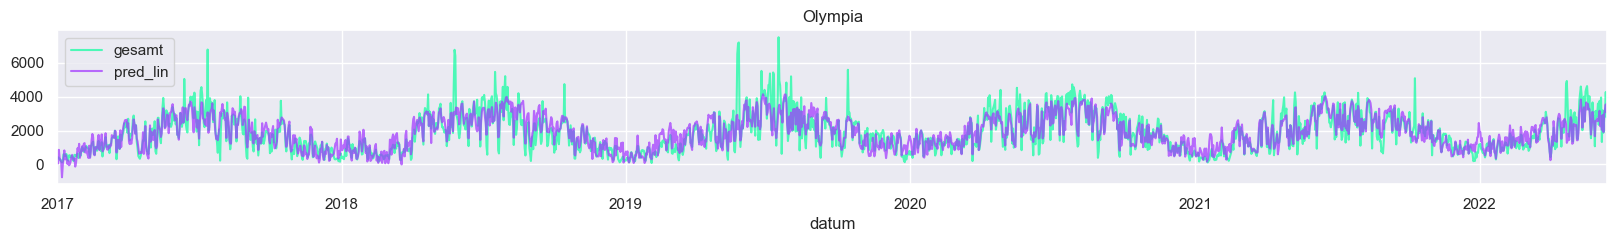

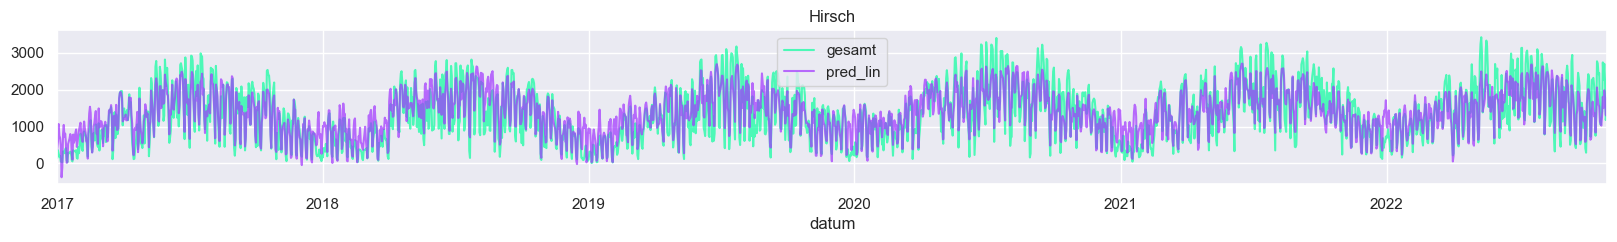

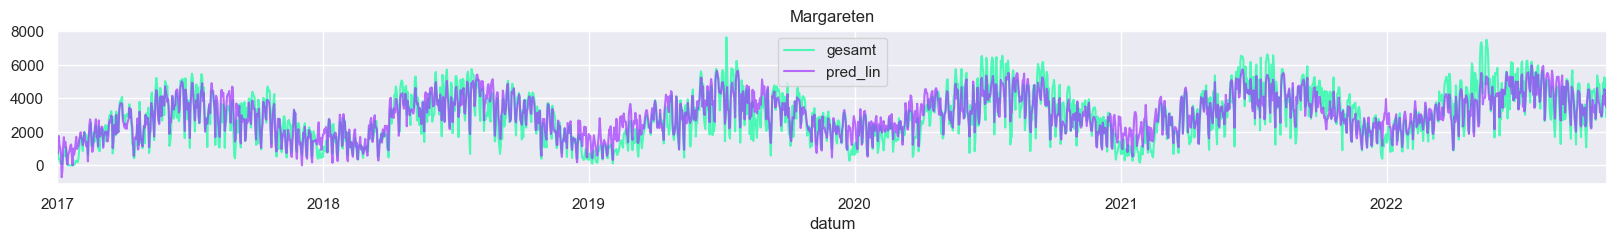

In [36]:
for j in range(len(zaehlstellen)):
    title = zaehlstellen[j-1]
    df_zaehlstellen[zaehlstellen[j-1]][['gesamt', 'pred_lin']].plot(figsize=(20, 2), alpha=0.7, title=title, rot=0, color=('#0aFE9F', '#A033FF'))


Gewichtung der einzelnen Features

In [37]:
params = pd.Series(np.round(model.coef_, decimals=2), index=X[zaehlstellen[i]].columns)
params

Mon               683.88
Tue              1123.31
Wed              1169.68
Thu              1035.44
Fri               645.92
Sat                 0.00
Sun                 0.00
holiday             0.00
ø-temp            153.22
dry-day           534.62
bewoelkung          0.00
sonnenstunden     195.89
oktoberfest         0.00
daylight_hrs        0.00
annual            152.83
Pandemie          314.27
dtype: float64

Berechnung des MSE für die einzelnen Zählstellen:

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
benchmark = {}
models = ['Linear', 'SVR Linear', 'SVR2', 'SVR RBF']

for j in range(len(zaehlstellen)):
    mse = np.round(np.sqrt(mean_squared_error(df_zaehlstellen[zaehlstellen[j]]['gesamt'], df_zaehlstellen[zaehlstellen[j]]['pred_lin'])), 2)
    benchmark[zaehlstellen[j]] = pd.DataFrame(index=models)
    benchmark[zaehlstellen[j]].index.name = 'Algorithmus'
    benchmark[zaehlstellen[j]].loc[['Linear'], 'sqrt(MSE)'] = mse


In [39]:
benchmark['Kreuther']

sqrt(MSE)
Algorithmus           
Linear          215.09
SVR Linear         NaN
SVR2               NaN
SVR RBF            NaN

Calculating: Kreuther
Calculating: Olympia
Calculating: Hirsch
Calculating: Margareten
Calculating: Erhardt


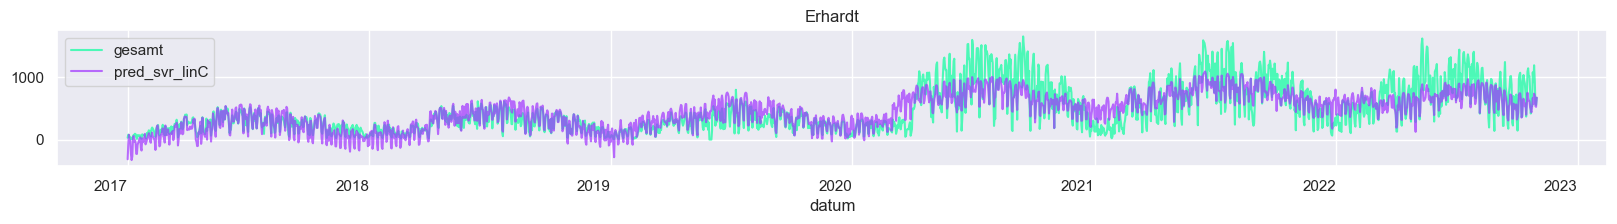

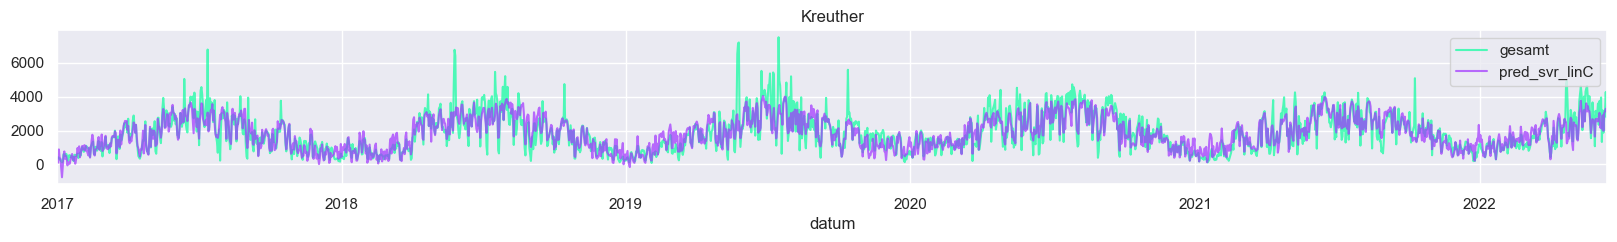

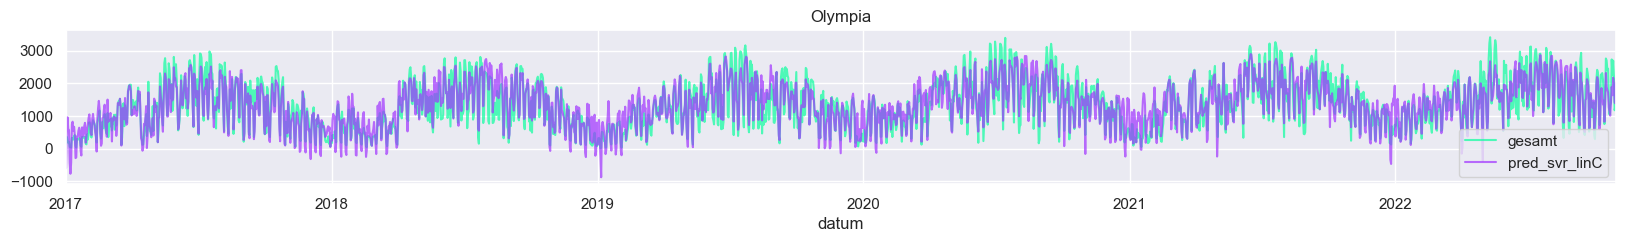

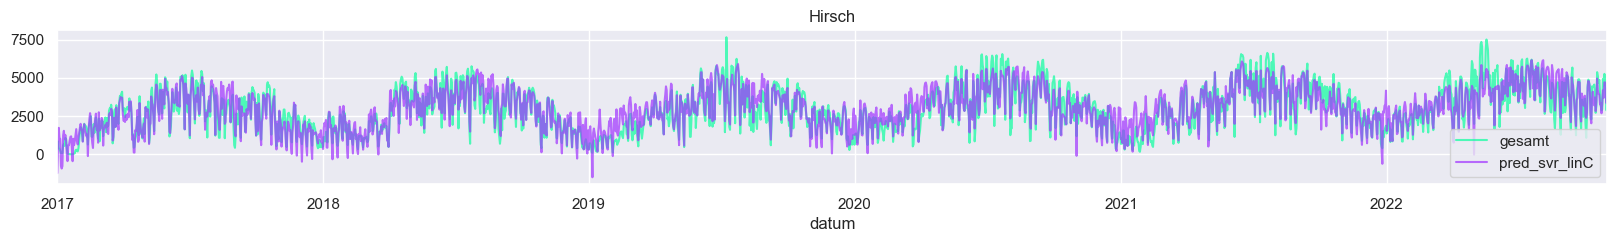

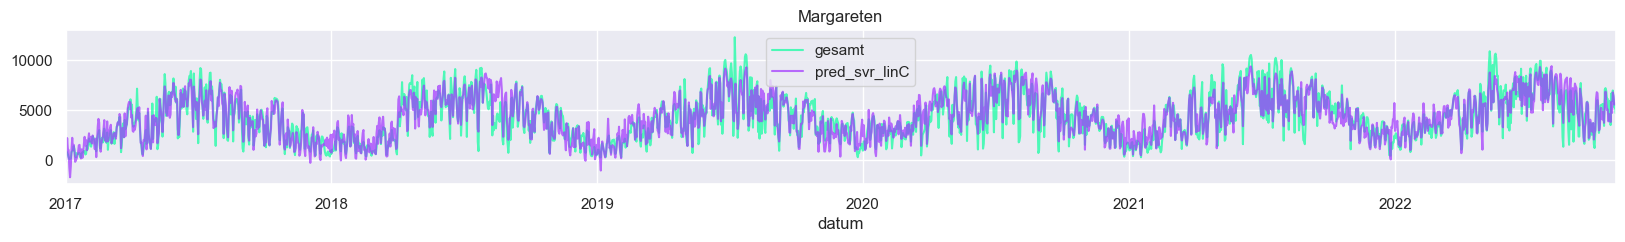

In [40]:
from sklearn.svm import SVR

for j in range(len(zaehlstellen)):
    print(f'Calculating: {zaehlstellen[j]}')
    df_zaehlstellen[zaehlstellen[j]]['pred_svr_linC'] = SVR(kernel='linear', C=1000).fit(X[zaehlstellen[j]], y[zaehlstellen[j]]).predict(X[zaehlstellen[j]])
    title = zaehlstellen[j-1]
    df_zaehlstellen[zaehlstellen[j]][['gesamt', 'pred_svr_linC']].plot(figsize=(20, 2), alpha=0.7, title=title, rot=0, color=('#0aFE9F', '#A033FF'))
    mse = np.round(np.sqrt(mean_squared_error(df_zaehlstellen[zaehlstellen[j]]['gesamt'], df_zaehlstellen[zaehlstellen[j]]['pred_svr_linC'])), 2)
    benchmark[zaehlstellen[j]].loc[['SVR Linear'], 'sqrt(MSE)'] = mse
    

Calculating: Kreuther
Calculating: Olympia
Calculating: Hirsch
Calculating: Margareten
Calculating: Erhardt


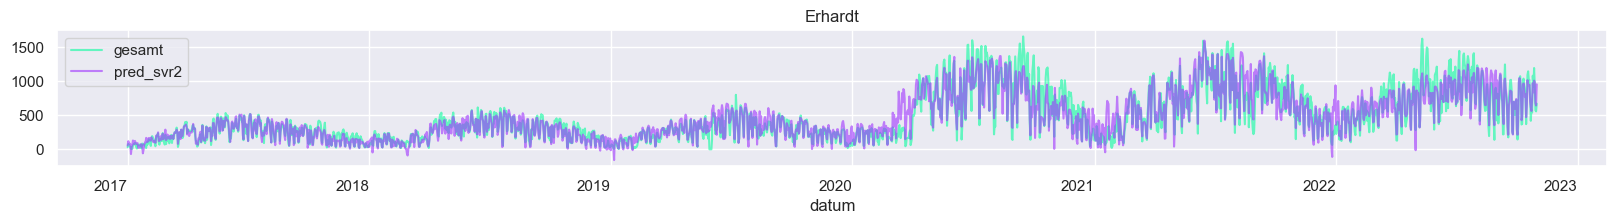

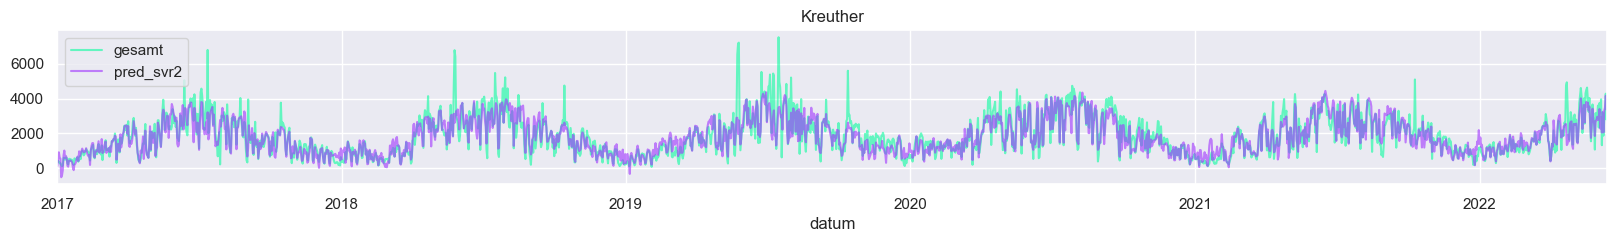

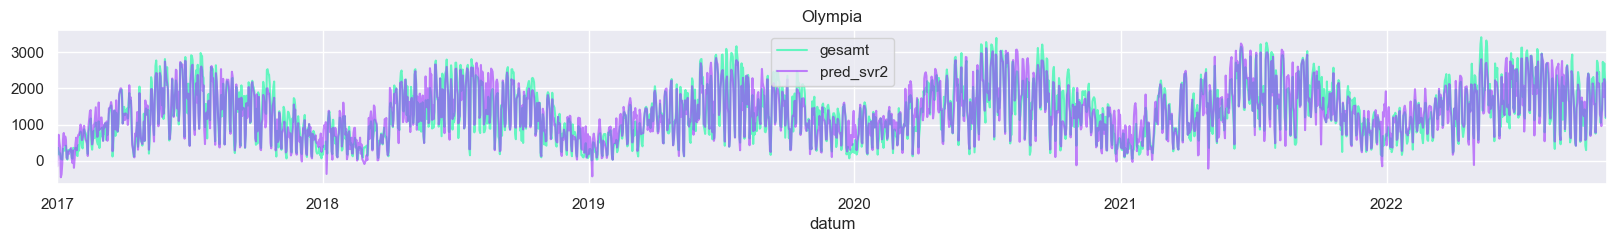

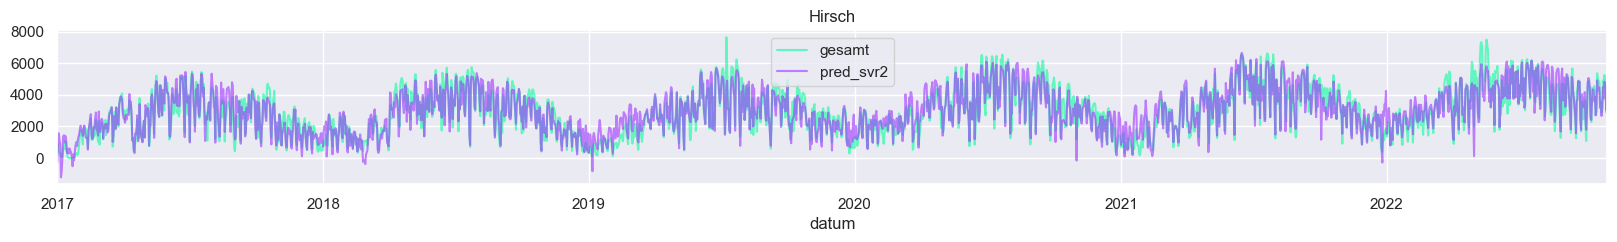

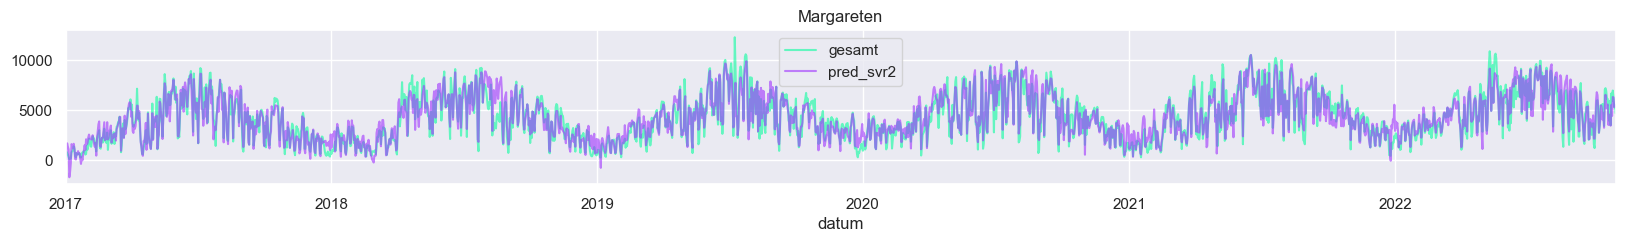

In [41]:
for j in range(len(zaehlstellen)):
    print(f'Calculating: {zaehlstellen[j]}')
    df_zaehlstellen[zaehlstellen[j]]['pred_svr2'] = SVR(kernel='poly', degree=2, C=100, gamma=0.1).fit(X[zaehlstellen[j]], y[zaehlstellen[j]]).predict(X[zaehlstellen[j]])
    title = zaehlstellen[j-1]
    df_zaehlstellen[zaehlstellen[j]][['gesamt', 'pred_svr2']].plot(figsize=(20, 2), alpha=0.6, title=title, rot=0, color=('#0aFE9F', '#A033FF'))
    mse = np.round(np.sqrt(mean_squared_error(df_zaehlstellen[zaehlstellen[j]]['gesamt'], df_zaehlstellen[zaehlstellen[j]]['pred_svr2'])), 2)
    benchmark[zaehlstellen[j]].loc[['SVR2'], 'sqrt(MSE)'] = mse

Calculating: Kreuther
Calculating: Olympia
Calculating: Hirsch
Calculating: Margareten
Calculating: Erhardt


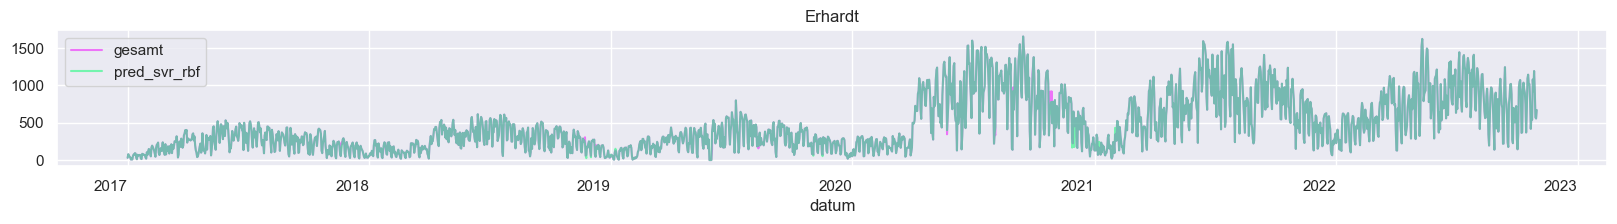

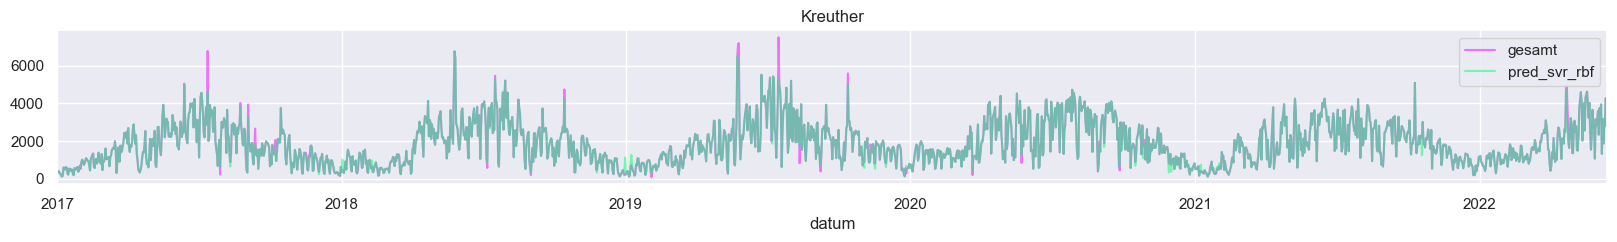

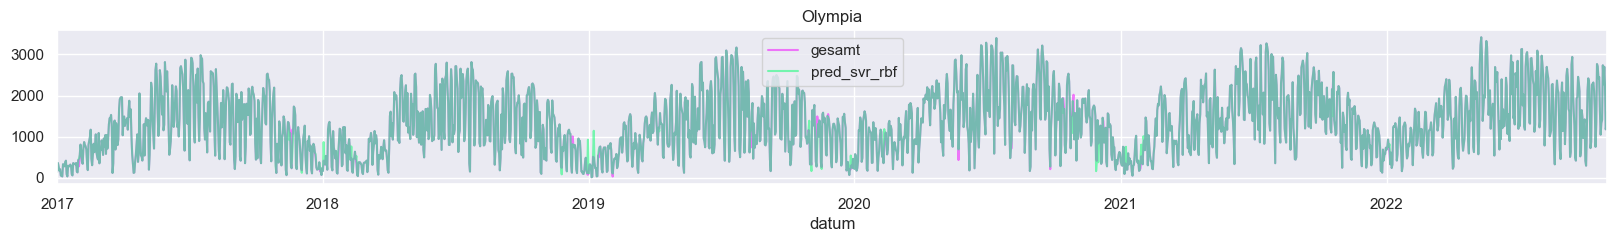

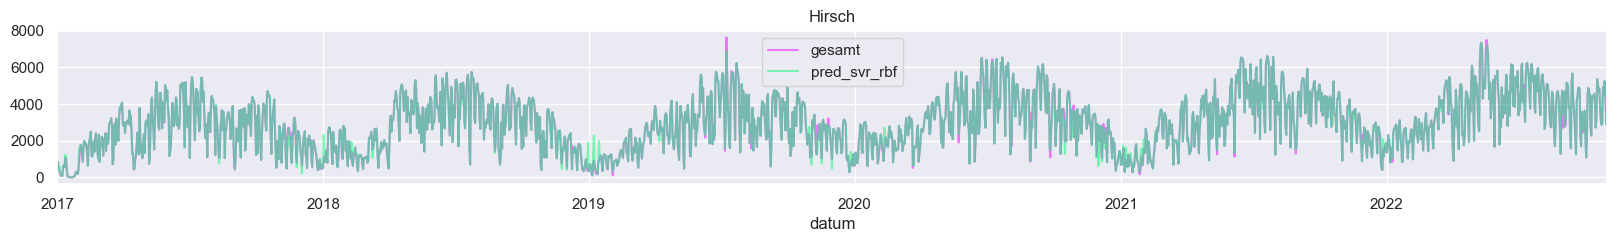

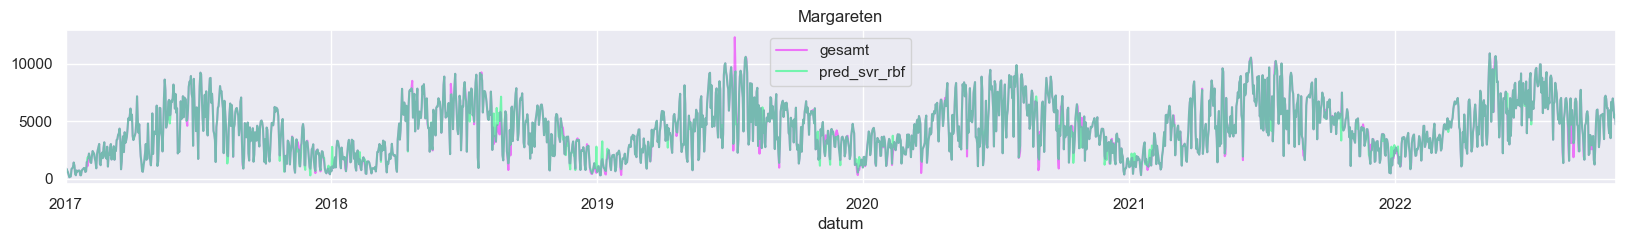

In [42]:
for j in range(len(zaehlstellen)):
    print(f'Calculating: {zaehlstellen[j]}')
    df_zaehlstellen[zaehlstellen[j]]['pred_svr_rbf'] = SVR(kernel='rbf', C=5000, gamma=0.1).fit(X[zaehlstellen[j]], y[zaehlstellen[j]]).predict(X[zaehlstellen[j]])
    title = zaehlstellen[j-1]
    df_zaehlstellen[zaehlstellen[j]][['gesamt', 'pred_svr_rbf']].plot(figsize=(20, 2), alpha=0.5, title=title, rot=0, color=('#F000FE', '#00FE6B'))
    mse = np.round(np.sqrt(mean_squared_error(df_zaehlstellen[zaehlstellen[j]]['gesamt'], df_zaehlstellen[zaehlstellen[j]]['pred_svr_rbf'])), 2)
    benchmark[zaehlstellen[j]].loc[['SVR RBF'], 'sqrt(MSE)'] = mse

In [43]:
for j in range(len(zaehlstellen)):
    print(benchmark[zaehlstellen[j]])

             sqrt(MSE)
Algorithmus           
Linear          215.09
SVR Linear      187.99
SVR2            133.09
SVR RBF          11.64
             sqrt(MSE)
Algorithmus           
Linear          581.77
SVR Linear      575.11
SVR2            538.25
SVR RBF         132.29
             sqrt(MSE)
Algorithmus           
Linear          381.56
SVR Linear      344.47
SVR2            304.47
SVR RBF          51.71
             sqrt(MSE)
Algorithmus           
Linear          708.34
SVR Linear      645.02
SVR2            576.14
SVR RBF         143.41
             sqrt(MSE)
Algorithmus           
Linear          977.60
SVR Linear      946.09
SVR2            856.45
SVR RBF         255.88


In [44]:
benchmark

{'Kreuther':              sqrt(MSE)
 Algorithmus           
 Linear          215.09
 SVR Linear      187.99
 SVR2            133.09
 SVR RBF          11.64,
 'Olympia':              sqrt(MSE)
 Algorithmus           
 Linear          581.77
 SVR Linear      575.11
 SVR2            538.25
 SVR RBF         132.29,
 'Hirsch':              sqrt(MSE)
 Algorithmus           
 Linear          381.56
 SVR Linear      344.47
 SVR2            304.47
 SVR RBF          51.71,
 'Margareten':              sqrt(MSE)
 Algorithmus           
 Linear          708.34
 SVR Linear      645.02
 SVR2            576.14
 SVR RBF         143.41,
 'Erhardt':              sqrt(MSE)
 Algorithmus           
 Linear          977.60
 SVR Linear      946.09
 SVR2            856.45
 SVR RBF         255.88}